## TUIA - Aprendizaje Automático 1 - 2023

### Trabajo Práctico: Predicción de lluvia en Australia.

### Integrantes:
- Ponce, Daniel
- Yañez, Mirian

El presente informe detalla el trabajo práctico llevado a cabo para la predicción de las condiciones climáticas en Australia, centrándonos en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport. 

El conjunto de datos utilizado se denomina weatherAUS.csv y contiene información climática de los últimos diez años.

## Variables de Interés:

**RainTomorrow y RainfallTomorrow**: Estas variables representan nuestro objetivo de predicción, indicando si lloverá al día siguiente y la cantidad de lluvia, respectivamente.

"RainTomorrow" (categórica, para un problema de clasificación)

"RainfallTomorrow" (continua, para un problema de regresión).

## Paquetes y Librerias

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sys.path.append("code")
current_dir = os.path.dirname(os.path.realpath('__file__'))
data_source = os.path.join(current_dir, 'data', 'weatherAUS.csv')

from cleaning.clean import Clean
from regresion_lineal.regresion import RegressionLineal
from shap_analyzer.shap_analyzer import SHAPAnalyzer
from modelo_base.regression import RegresionModelBase
from modelo_base.clasification import ClasificacionModelBase
from neural_network.classification_neural import ClassificationNeuralNetwork
from neural_network.regression_neural import RegressionNeuralNetwork
from sklearn.model_selection import train_test_split


2024-02-25 19:05:46.667505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Convertimos en variables numéricas las columnas 'RainToday' y 'RainTomorrow'**

In [2]:
df = pd.read_csv(data_source)
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# 2) Análisis descriptivo

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

### **Hay un total de 145412 datos, se puede observar que hay datos nulos.**

## Filtramos por las ciudades de interés

In [6]:
ciudades = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']
df = df[df['Location'].isin(ciudades)]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15986 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   Location          15986 non-null  object 
 3   MinTemp           15495 non-null  float64
 4   MaxTemp           15500 non-null  float64
 5   Rainfall          15199 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       14529 non-null  object 
 9   WindGustSpeed     14531 non-null  float64
 10  WindDir9am        15291 non-null  object 
 11  WindDir3pm        15696 non-null  object 
 12  WindSpeed9am      15725 non-null  float64
 13  WindSpeed3pm      15737 non-null  float64
 14  Humidity9am       15416 non-null  float64
 15  Humidity3pm       15461 non-null  float64
 16  Pressure9am       15251 non-null  float64

### Ahora contamos con un total de 15986 datos.

### Cantidad de valores faltantes:

In [8]:
df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

### Estadística descriptiva de las variables numéricas

In [9]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000,15199.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,0.234094,0.233963,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,0.423445,0.423363,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000,0.000000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000,0.000000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000,0.000000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.000000,0.000000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,1.000000,1.000000,119.400000


### Analizamos nuestra variable objetivo, la que queremos predecir para saber si el df esta balanceado o no.

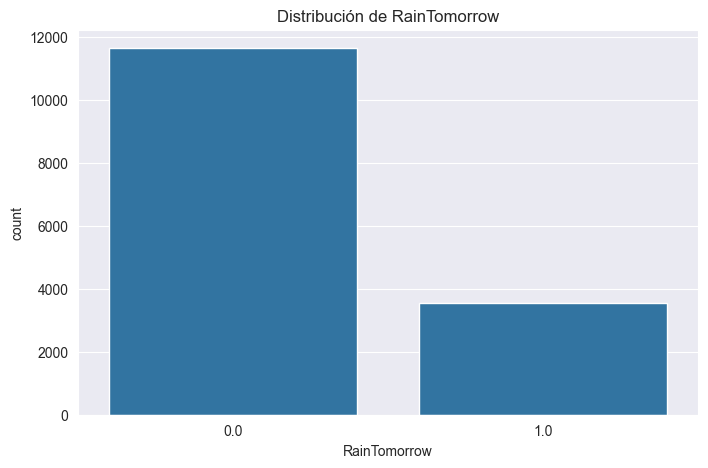

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribución de RainTomorrow')
plt.show()

### Se puede observar que el dataset no está balanceado

### Histogramas

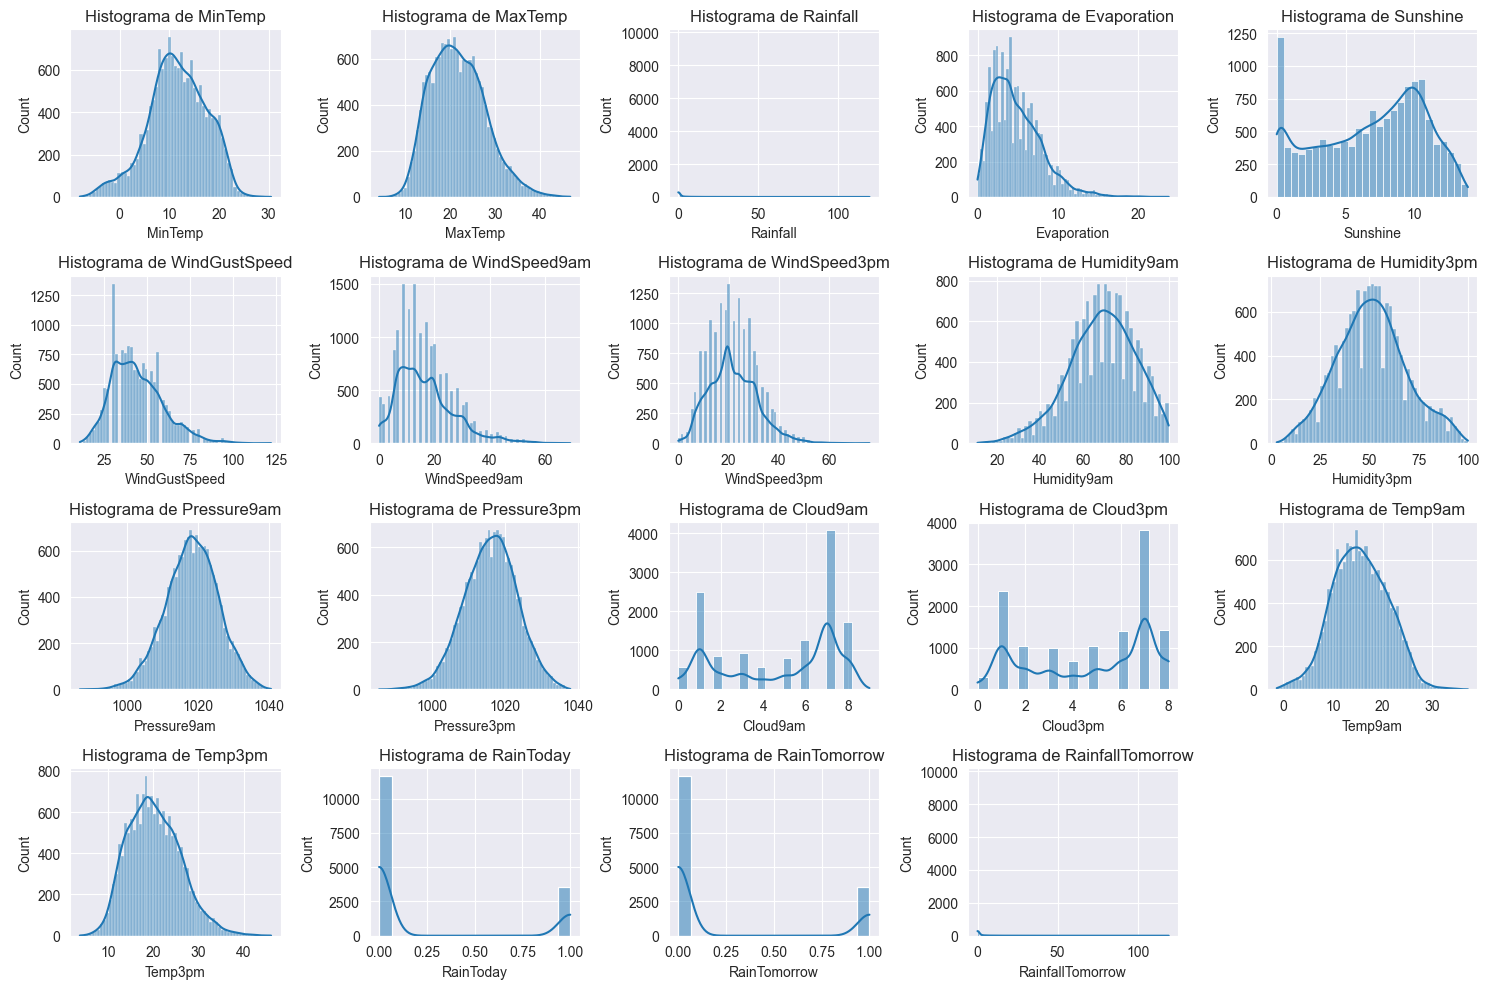

In [11]:
numeric_columns = df.select_dtypes(include=[np.float64]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


# Matriz de correlación 

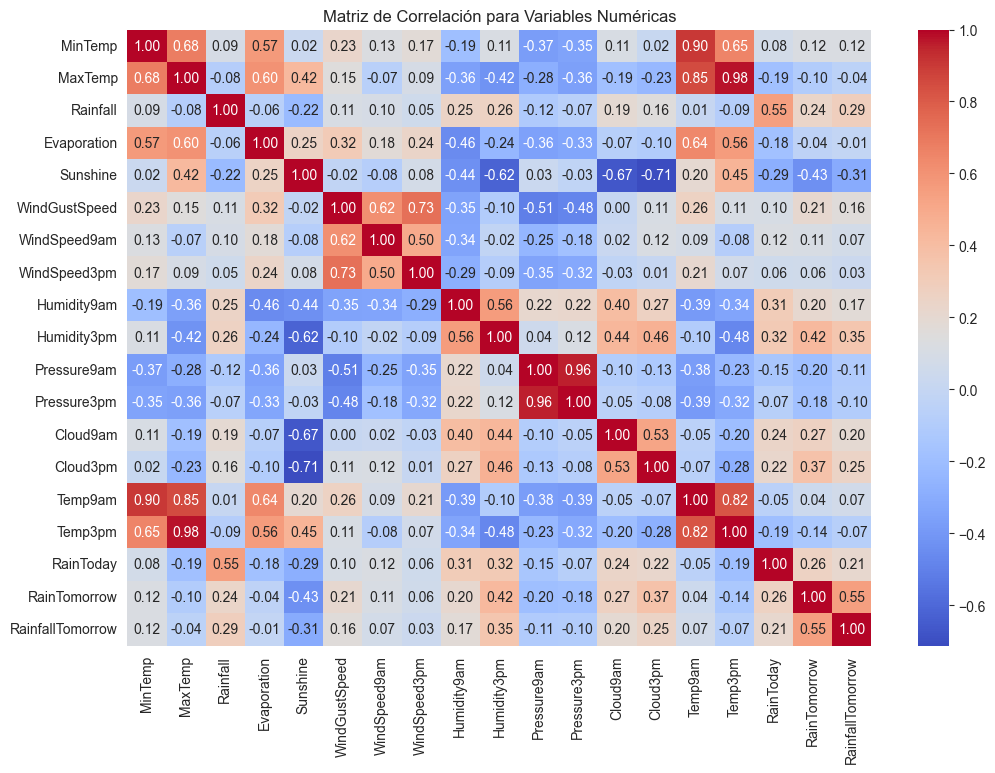

In [12]:
correlation_matrix_numeric = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()


Podemos observar que las variables con mayor correlación con RainfallTomorrow son:

*   Humidity3pm (0.35)
*   Rainfall (0.29)
*   Cloud3pm (0.25)
*   Sunshine (-0.31)

y las variables con mayor correlación con RainTomorrow son:

*   Humidity3pm (0,42)
*   Cloud3pm (0.37)
*   Rainfall (0,24)
*   Sunshine (-0,43)

## Realizamos el split de entrenamiento y prueba

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

## Realizamos la limpieza en la clase clean y volvemos a visualizar los datos

In [14]:
data = Clean(train)
data_clean = data.process()
data_clean.head()

Archivo guardado exitosamente en 'data/weatherAUS_clean.csv'


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
35279,2014-02-02,SydneyAirport,1.341772,0.988372,0.00,0.75,0.822581,67.5,67.5,45.0,...,-0.347826,-0.295918,-0.183673,-0.6,-1.0,1.250,1.085366,0.0,0.0,0.00
68559,2012-05-11,Melbourne,0.063291,-0.313953,1.25,-0.25,-0.258065,225.0,157.5,225.0,...,0.000000,-0.020408,0.102041,-0.2,0.0,-0.225,-0.414634,0.0,0.0,0.00
31088,2010-08-10,Sydney,-0.278481,-0.558140,3.50,-0.45,-1.225806,NaN,202.5,67.5,...,1.695652,0.071429,-0.255102,0.4,0.4,-0.400,-0.426829,1.0,1.0,5.75
68224,2011-06-11,Melbourne,-0.177215,-0.569767,0.00,-0.80,-0.048387,292.5,202.5,292.5,...,0.478261,1.173469,1.316327,-0.2,0.0,-0.525,-0.597561,0.0,0.0,0.00
31349,2011-05-28,Sydney,-0.379747,-0.441860,0.00,-0.25,-0.725806,292.5,180.0,270.0,...,0.695652,0.540816,0.632653,0.4,0.4,-0.625,-0.353659,0.0,0.0,0.00


In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12788 entries, 35279 to 46492
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              12788 non-null  object 
 1   Location          12788 non-null  object 
 2   MinTemp           12788 non-null  float64
 3   MaxTemp           12788 non-null  float64
 4   Rainfall          12788 non-null  float64
 5   Evaporation       12788 non-null  float64
 6   Sunshine          12788 non-null  float64
 7   WindGustDir       12787 non-null  float64
 8   WindDir9am        12788 non-null  float64
 9   WindDir3pm        12788 non-null  float64
 10  WindSpeed9am      12788 non-null  float64
 11  WindSpeed3pm      12788 non-null  float64
 12  Humidity9am       12788 non-null  float64
 13  Humidity3pm       12788 non-null  float64
 14  Pressure9am       12788 non-null  float64
 15  Pressure3pm       12788 non-null  float64
 16  Cloud9am          12788 non-null  float64

In [16]:
data_clean.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12787.000000,12788.000000,12788.000000,12788.000000,12788.000000,...,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000,12788.000000
mean,0.009652,0.055885,2.699249,0.154049,-0.103910,169.189020,171.403269,172.242532,0.111535,0.133827,...,0.006858,-0.015536,-0.018765,-0.248905,-0.250485,0.009269,0.056990,0.222318,0.219659,2.663630
std,0.732319,0.701842,8.959895,0.763875,0.611200,96.058931,83.856787,103.008048,0.792182,0.731351,...,0.766875,0.757736,0.741994,0.545312,0.518455,0.689791,0.711890,0.415820,0.414032,8.809334
min,-2.468354,-1.988372,0.000000,-1.050000,-1.225806,0.000000,0.000000,0.000000,-1.153846,-1.538462,...,-2.086957,-3.244898,-3.142857,-1.200000,-1.200000,-2.075000,-1.951220,0.000000,0.000000,0.000000
25%,-0.455696,-0.476744,0.000000,-0.450000,-0.596774,90.000000,90.000000,90.000000,-0.461538,-0.384615,...,-0.521739,-0.520408,-0.510204,-0.800000,-0.800000,-0.487500,-0.475610,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.016129,180.000000,180.000000,157.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012500,0.000000,0.000000,0.000000,0.000000
75%,0.531646,0.511628,0.750000,0.600000,0.387097,270.000000,247.500000,270.000000,0.538462,0.615385,...,0.478261,0.489796,0.479592,0.200000,0.200000,0.500000,0.524390,0.000000,0.000000,0.750000
max,2.189873,2.976744,149.250000,4.900000,1.016129,337.500000,337.500000,337.500000,4.153846,4.307692,...,2.130435,2.224490,2.193878,0.600000,0.400000,2.725000,3.219512,1.000000,1.000000,136.750000


In [17]:
print(data_clean.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')


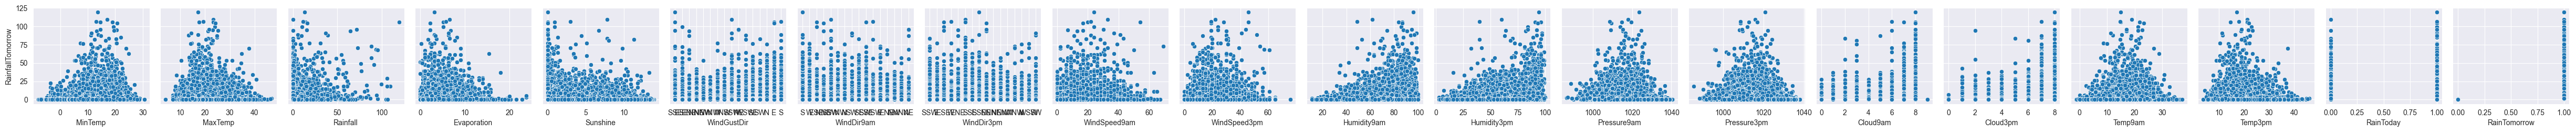

In [18]:
#Observamos la distribución para ver si hay linealidad
columnas = [col for col in data_clean.columns if ((col != 'RainfallTomorrow') & (col != 'Location') & (col != 'Date'))]

sns.pairplot(df, x_vars=columnas, y_vars='RainfallTomorrow')
plt.show()

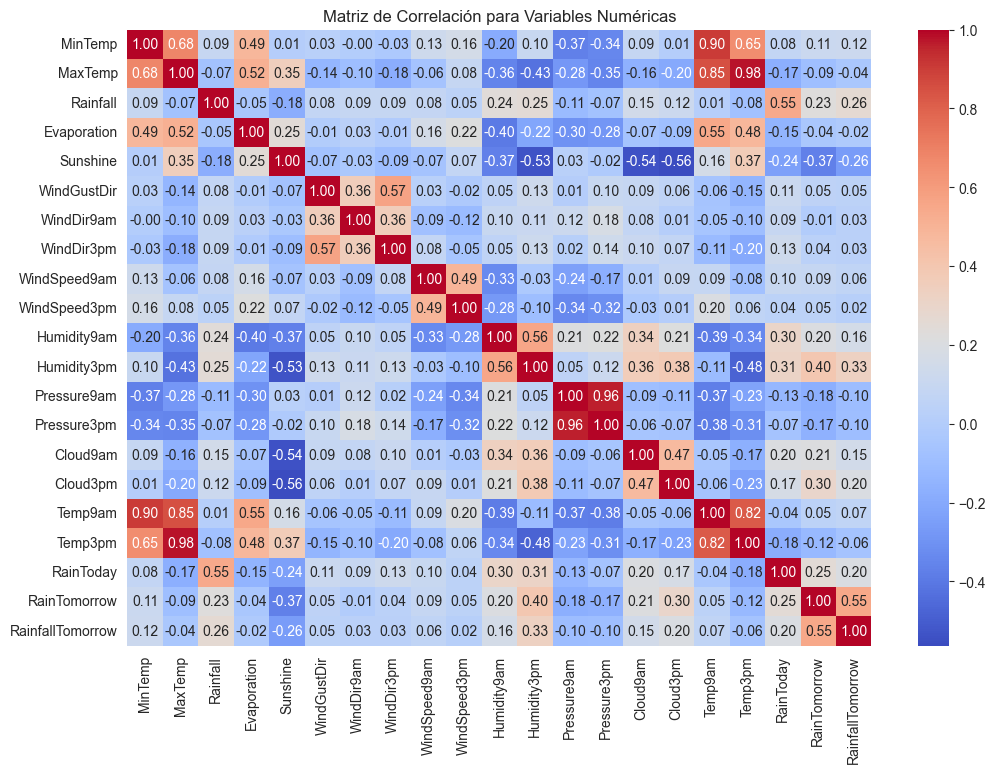

In [19]:
# Seleccionar columnas numéricas
numeric_columns = data_clean.select_dtypes(include=[np.float64, np.int32]).columns

# Matriz de correlación para variables numéricas
correlation_matrix_numeric = data_clean[numeric_columns].corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()

### En esta parte implementamos en simultaneo las siguientes consignas:

* Implementar la solución del problema de regresión con regresión lineal múltiple.

* Optimizar la selección de hiperparámetros.

* Implementar explicabilidad del modelo. SHAP


In [20]:
regresion_clasic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_clasic.classic()
metricas = regresion_clasic.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal clasic:")
print(metricas)

Métricas del modelo Regresion lineal clasic:
{'MSE': 50.87206803250378, 'R2': 0.15547085318608322, 'RMSE': 7.132465775067118, 'MAE': 3.5815582190468205, 'MAPE': inf}


In [21]:
#aplicamos validación cruzada
print(x_test)
regresion_clasic.cross_validate(x_test, y_test, modelo, cv=5)
print(f"El modelo")
print(x_test, modelo)

       Rainfall  Humidity3pm  Cloud3pm
66226      0.00    -0.043478       0.2
30285      1.25     1.086957      -0.8
46259      0.25    -0.304348       0.2
47087      0.00     0.000000       0.4
33157     36.75     1.521739       0.2
...         ...          ...       ...
34484      8.75     0.521739       0.2
64668      0.25     1.608696       0.2
69450      0.00    -0.869565       0.2
32380      0.00    -0.913043      -1.0
45738      6.50    -0.478261      -1.0

[2558 rows x 3 columns]
Mean Squared Error (CV): 50.99747366381723
R^2 Score (CV): 0.15338898950499325
Mean Absolute Error (CV): 3.409315100944318
El modelo
       Rainfall  Humidity3pm  Cloud3pm
66226      0.00    -0.043478       0.2
30285      1.25     1.086957      -0.8
46259      0.25    -0.304348       0.2
47087      0.00     0.000000       0.4
33157     36.75     1.521739       0.2
...         ...          ...       ...
34484      8.75     0.521739       0.2
64668      0.25     1.608696       0.2
69450      0.00    -0.8

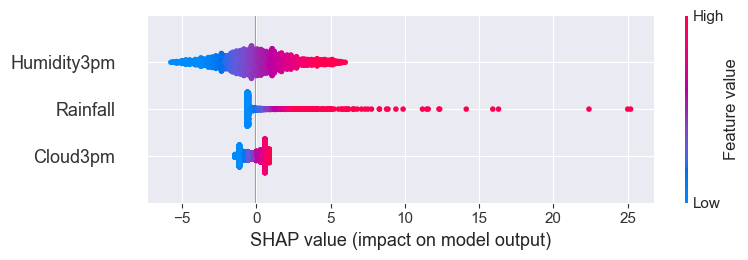

In [22]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [23]:
print('métodos de gradiente descendiente')
regresion_gradient_desecent = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regresion_gradient_desecent.gradient_descent()
metricas = regresion_gradient_desecent.metrics(y_test, y_pred)
print(f"Métricas del Modelo:")
print(metricas)

métodos de gradiente descendiente
Métricas del Modelo:
{'MSE': 2.881335260645672e+21, 'R2': -3.7481805494084035e+19, 'RMSE': 53678070574.916084, 'MAE': 25949599117.299557, 'MAPE': inf}


In [24]:
#aplicamos validación cruzada
regresion_gradient_desecent.cross_validate(x_test, y_test, modelo, cv=5)

Mean Squared Error (CV): 2.3880303434126025e+24
R^2 Score (CV): -3.1064656053146793e+22
Mean Absolute Error (CV): 287431142146.2168


(2.3880303434126025e+24, -3.1064656053146793e+22, 287431142146.2168)

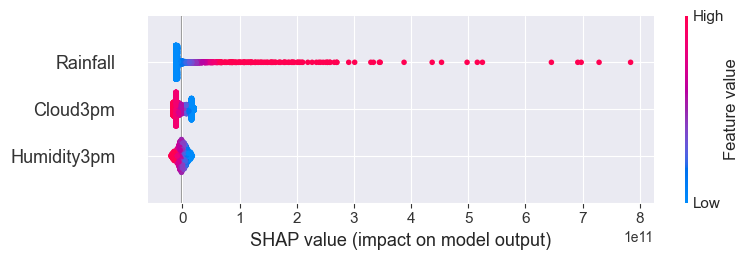

In [25]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [26]:
param_grid = {
    'fit_intercept': [True, False],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 500, 1000]  
}

regresion_gradient_descent = RegressionLineal(data_clean)
x_test, y_test, y_pred, best_model = regresion_gradient_descent.gradient_descent_optimize_hyperparameters(param_grid)
metricas = regresion_gradient_descent.metrics(y_test, y_pred)
print(f"Métricas del mejor modelo:")
print(metricas)
print("Mejores hiperparámetros:", best_model.get_params())

Métricas del mejor modelo:
{'MSE': 66.07353837694733, 'R2': 0.14048339060839765, 'RMSE': 8.12856311883886, 'MAE': 3.7615569373083333, 'MAPE': inf}
Mejores hiperparámetros: {'alpha': 0.1, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 100, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


## Regresión linean de Lasso

In [27]:
# regresion de Lasso
regresion_lasso = RegressionLineal(data_clean)
x_test, y_test, y_pred, lasso_model = regresion_lasso.lasso_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Lasso:")
print(metricas)

Métricas del modelo Regresion lineal Lasso:
{'MSE': 68.12861114333221, 'R2': 0.1137500080833228, 'RMSE': 8.254005763466138, 'MAE': 3.6174426512939863, 'MAPE': inf}


In [28]:
#aplicamos validación cruzada
regresion_lasso.cross_validate(x_test, y_test, modelo, cv=5)

Mean Squared Error (CV): 6.51957677083571e+22
R^2 Score (CV): -8.480981431277569e+20
Mean Absolute Error (CV): 69048534769.16945


(6.51957677083571e+22, -8.480981431277569e+20, 69048534769.16945)

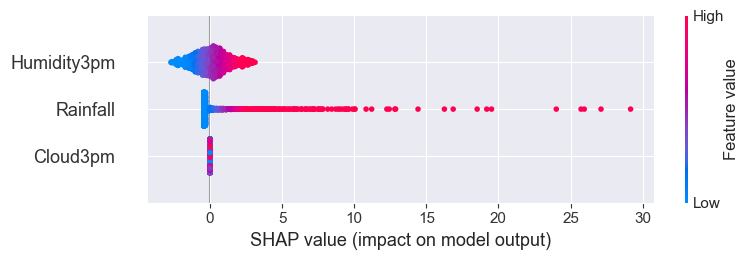

In [29]:
try:
    shap_analyzer = SHAPAnalyzer(lasso_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [30]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Lasso', param_grid_lasso)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Lasso:")
print(metricas_lasso)
print("Mejores hiperparámetros para Lasso:", best_lasso_model.get_params())


Métricas del mejor modelo Lasso:
{'MSE': 66.0838603270938, 'R2': 0.14034911767841485, 'RMSE': 8.129198012540586, 'MAE': 3.8215767460872487, 'MAPE': inf}
Mejores hiperparámetros para Lasso: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


## Regresión lineal de Ridge

In [31]:
# regresion de Ridge

regresion_ridge = RegressionLineal(data_clean)
x_test, y_test, y_pred, ridge_model = regresion_ridge.ridge_regression()
metricas = regresion_lasso.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Ridge:")
print(metricas)


Métricas del modelo Regresion lineal Ridge:
{'MSE': 66.08700065508451, 'R2': 0.14030826676996866, 'RMSE': 8.129391161402218, 'MAE': 3.826983032173833, 'MAPE': inf}


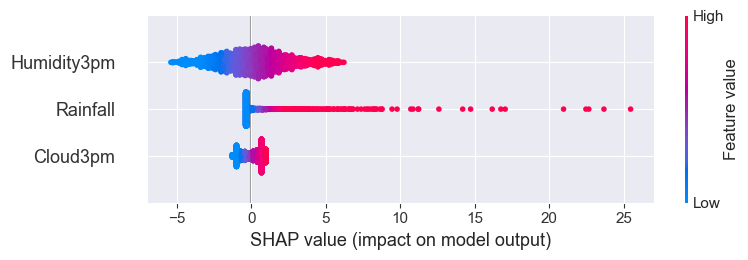

In [32]:
try:
    shap_analyzer = SHAPAnalyzer(ridge_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [33]:
# Crear una instancia de la clase RegressionLineal
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_lasso, best_lasso_model = regresion_lineal.optimize_hyperparameters('Ridge', param_grid_Ridge)

# Calcular métricas
metricas_lasso = regresion_lineal.metrics(y_test, y_pred_lasso)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Ridge:")
print(metricas_lasso)
print("Mejores hiperparámetros para Ridge:", best_lasso_model.get_params())

Métricas del mejor modelo Ridge:
{'MSE': 66.08445144448265, 'R2': 0.14034142813693884, 'RMSE': 8.129234370128755, 'MAE': 3.8131195594377885, 'MAPE': inf}
Mejores hiperparámetros para Ridge: {'alpha': 100.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.


## Regresión lineal de Elasticnet

In [34]:
# regresion de Elasticnet

regresion_elasticnet = RegressionLineal(data_clean)
x_test, y_test, y_pred, elasticnet_model = regresion_elasticnet.elasticnet_regression()

metricas = regresion_elasticnet.metrics(y_test, y_pred)
print(f"Métricas del modelo Regresion lineal Elasticnet:")
print(metricas)

Métricas del modelo Regresion lineal Elasticnet:
{'MSE': 68.4876878653982, 'R2': 0.10907896405809026, 'RMSE': 8.275728841944872, 'MAE': 3.6211542264848484, 'MAPE': inf}


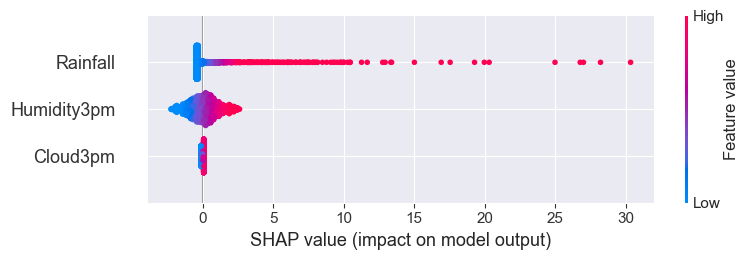

In [35]:
try:
    shap_analyzer = SHAPAnalyzer(elasticnet_model, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [36]:
regresion_lineal = RegressionLineal(data_clean)

# Definir el rango de valores para el hiperparámetro alpha
param_grid_Elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Puedes ajustar estos valores según sea necesario
}
# Llamar al método optimize_hyperparameters para Lasso
x_test, y_test, y_pred_elasticnet, best_lasso_model = regresion_lineal.optimize_hyperparameters('ElasticNet', param_grid_Elasticnet)

# Calcular métricas
metricas_elasticnet = regresion_lineal.metrics(y_test, y_pred_elasticnet)

# Imprimir métricas y mejores hiperparámetros para Lasso
print(f"Métricas del mejor modelo Elasticnet:")
print(metricas_elasticnet)
print("Mejores hiperparámetros para Elasticnet:", best_lasso_model.get_params())

Métricas del mejor modelo Elasticnet:
{'MSE': 66.08413091905093, 'R2': 0.14034559768709554, 'RMSE': 8.129214655737105, 'MAE': 3.8153972258470916, 'MAPE': inf}
Mejores hiperparámetros para Elasticnet: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.3, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


## Regresión Logística

Accuracy: 0.83
Precision: 0.72
Recall: 0.34
F1 Score: 0.46
ROC-AUC: 0.65
Matiz de confusión:
          pred: No  Pred: Si
Real: No      1939        74
Real: si       359       186


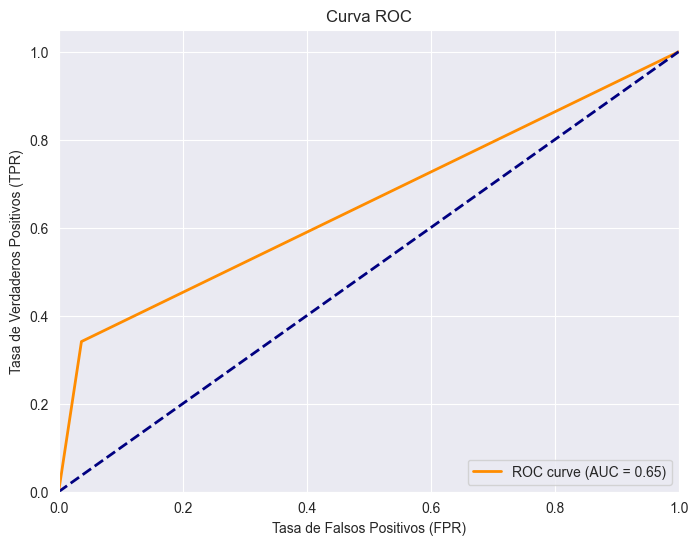

In [37]:
#regresion logistica
regression_logistic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regression_logistic.logistic()
regression_logistic.logic_metrics(y_test, y_pred)

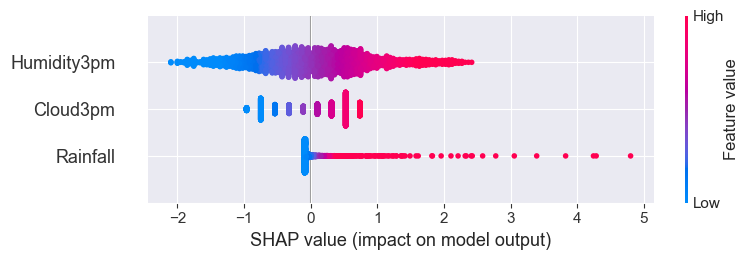

In [38]:
try:
    shap_analyzer = SHAPAnalyzer(modelo, x_test)
    shap_analyzer.summary_plot()
except Exception as e:
    print(f"Error en la función apply_shap: {str(e)}")

In [39]:
regresion_lineal = RegressionLineal(data_clean)
#buscando los hipperparametros
param_grid_logistic = {
    'C': [ 0.01, 0.1],
    'penalty': ['l1'],
    'solver': ['liblinear']
}
x_test_logistic, y_test_logistic, y_pred_logistic, best_logistic_model = regresion_lineal.optimize_hyperparameters_logistic(param_grid_logistic)

# Calcular métricas
metricas_logistic = regresion_lineal.metrics(y_test_logistic, y_pred_logistic)

# Imprimir métricas y mejores hiperparámetros para la regresión logística
print(f"Métricas del mejor modelo de regresión logística:")
print(metricas_logistic)
print("Mejores hiperparámetros para la regresión logística:", best_logistic_model.get_params())


Métricas del mejor modelo de regresión logística:
{'MSE': 0.17200938232994528, 'R2': 0.010449224330823292, 'RMSE': 0.4147401383154822, 'MAE': 0.17200938232994528, 'MAPE': inf}
Mejores hiperparámetros para la regresión logística: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.


### Observamos que tanto el modelo como la validación cruzada tienden a sobreajustar las predicciones hacia la clase negativa. Esto se debe a que la clase negativa es la más predominante. Para abordar este desbalance, procedemos a equilibrar las clases.

Accuracy: 0.71
Precision: 0.40
Recall: 0.67
F1 Score: 0.50
ROC-AUC: 0.69
Matiz de confusión:
          pred: No  Pred: Si
Real: No      1422       563
Real: si       191       382


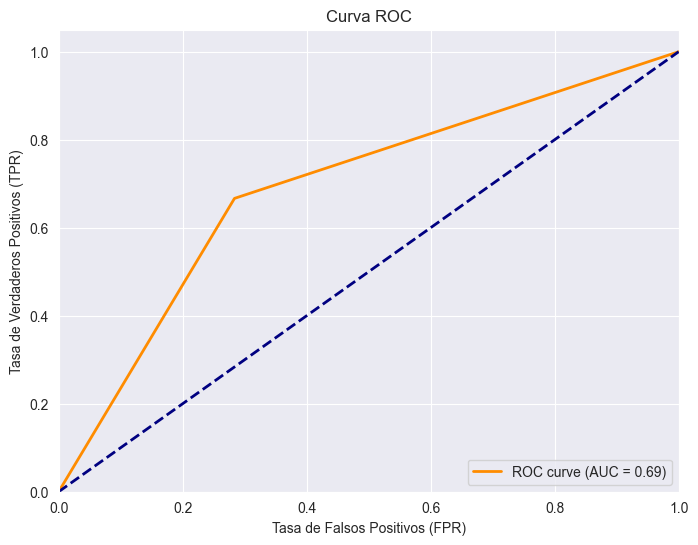

In [40]:
#regresion logistica balanceada
regression_logistic = RegressionLineal(data_clean)
x_test, y_test, y_pred, modelo = regression_logistic.logistic_balanced()
regression_logistic.logic_metrics(y_test, y_pred)

### Optamos por mantener el modelo balanceado, ya que aunque observamos una disminución en las métricas de predicción negativa, consideramos prioritario mejorar las métricas de predicción positiva. En este contexto, valoramos una mayor precisión en la anticipación de días lluviosos.

## Implementar un modelo base para clasificación y uno para regresión

In [41]:

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado 'data_clean' con las características relevantes y la etiqueta 'RainTomorrow'
clasificacion_modelo_base = ClasificacionModelBase(data_clean)
metricas_rendimiento_base = clasificacion_modelo_base.train_and_evaluate()

# Mostrar métricas de rendimiento
print("Métricas de rendimiento del modelo base de clasificación:")
for metric, value in metricas_rendimiento_base.items():
    print(f"{metric}: {value:.2f}")

Métricas de rendimiento del modelo base de clasificación:
Accuracy: 0.78
Precision: 0.78
Recall: 1.00
F1-score: 0.87


In [42]:

# Ejemplo de uso
# Suponiendo que tienes un DataFrame llamado 'data' con las columnas 'Temp3pm' y 'RainfallTomorrow'
modelo_regresion_base = RegresionModelBase(data_clean)
modelo_entrenado, error_cuadratico_medio, coeficiente_determinacion = modelo_regresion_base.train()

# Mostrar métricas de rendimiento
print("Métricas de rendimiento:")
print(f"Error cuadrático medio (MSE): {error_cuadratico_medio:.2f}")
print(f"Coeficiente de determinación (R^2): {coeficiente_determinacion:.2f}")


Métricas de rendimiento:
Error cuadrático medio (MSE): 74.14
Coeficiente de determinación (R^2): 0.04


## Implementar las soluciones con una red neuronal

In [43]:
print('=============================clasificacion con redes neuronales================================================')
classification_nn_model = ClassificationNeuralNetwork(data_clean)
trained_model = classification_nn_model.classification()


[I 2024-02-25 19:06:12,265] A new study created in memory with name: no-name-f5cf5173-3554-4fc4-ab56-b2d67a83d25e


=============================clasificacion con redes neuronales================================================
80/80 [==============================] - 0s 968us/step


[I 2024-02-25 19:06:17,106] Trial 0 finished with value: 0.22400312744331508 and parameters: {'num_layers': 3, 'n_units_l0': 1, 'n_units_l1': 6, 'n_units_l2': 15, 'learning_rate': 0.00015652842752955317}. Best is trial 0 with value: 0.22400312744331508.


80/80 [==============================] - 0s 874us/step


[I 2024-02-25 19:06:21,030] Trial 1 finished with value: 0.22400312744331508 and parameters: {'num_layers': 2, 'n_units_l0': 7, 'n_units_l1': 3, 'learning_rate': 0.04127680332653021}. Best is trial 0 with value: 0.22400312744331508.


80/80 [==============================] - 0s 1ms/step


[I 2024-02-25 19:06:27,261] Trial 2 finished with value: 0.22322126661454256 and parameters: {'num_layers': 3, 'n_units_l0': 5, 'n_units_l1': 15, 'n_units_l2': 5, 'learning_rate': 0.0008354413726961799}. Best is trial 2 with value: 0.22322126661454256.


80/80 [==============================] - 0s 1ms/step


[I 2024-02-25 19:06:33,318] Trial 3 finished with value: 0.22087568412822522 and parameters: {'num_layers': 2, 'n_units_l0': 7, 'n_units_l1': 15, 'learning_rate': 0.00018983535938558736}. Best is trial 3 with value: 0.22087568412822522.


80/80 [==============================] - 0s 940us/step


[I 2024-02-25 19:06:38,193] Trial 4 finished with value: 0.22400312744331508 and parameters: {'num_layers': 3, 'n_units_l0': 12, 'n_units_l1': 1, 'n_units_l2': 8, 'learning_rate': 4.007671847524686e-05}. Best is trial 3 with value: 0.22087568412822522.


80/80 [==============================] - 0s 983us/step


[I 2024-02-25 19:06:42,798] Trial 5 finished with value: 0.22400312744331508 and parameters: {'num_layers': 3, 'n_units_l0': 13, 'n_units_l1': 7, 'n_units_l2': 1, 'learning_rate': 6.0428555141941414e-05}. Best is trial 3 with value: 0.22087568412822522.


80/80 [==============================] - 0s 794us/step


[I 2024-02-25 19:06:46,167] Trial 6 finished with value: 0.21853010164190778 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.0003690997552872261}. Best is trial 6 with value: 0.21853010164190778.


80/80 [==============================] - 0s 848us/step


[I 2024-02-25 19:06:49,458] Trial 7 finished with value: 0.18373729476153244 and parameters: {'num_layers': 1, 'n_units_l0': 7, 'learning_rate': 0.0006798952897149271}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 811us/step


[I 2024-02-25 19:06:53,523] Trial 8 finished with value: 0.19546520719311966 and parameters: {'num_layers': 1, 'n_units_l0': 6, 'learning_rate': 0.0003929963312698842}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 888us/step


[I 2024-02-25 19:06:57,704] Trial 9 finished with value: 0.22400312744331508 and parameters: {'num_layers': 2, 'n_units_l0': 12, 'n_units_l1': 16, 'learning_rate': 0.019972794122109432}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 788us/step


[I 2024-02-25 19:07:01,034] Trial 10 finished with value: 0.26583268178264274 and parameters: {'num_layers': 1, 'n_units_l0': 2, 'learning_rate': 1.316261784470147e-05}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 796us/step


[I 2024-02-25 19:07:04,437] Trial 11 finished with value: 0.20406567630961692 and parameters: {'num_layers': 1, 'n_units_l0': 9, 'learning_rate': 0.0044517133313547105}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 760us/step


[I 2024-02-25 19:07:07,880] Trial 12 finished with value: 0.19429241594996094 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 0.003143221612836423}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 824us/step


[I 2024-02-25 19:07:11,252] Trial 13 finished with value: 0.20641125879593436 and parameters: {'num_layers': 1, 'n_units_l0': 15, 'learning_rate': 0.004668637186092854}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 805us/step


[I 2024-02-25 19:07:14,701] Trial 14 finished with value: 0.21813917122752147 and parameters: {'num_layers': 1, 'n_units_l0': 16, 'learning_rate': 0.0035573816253130757}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 878us/step


[I 2024-02-25 19:07:18,802] Trial 15 finished with value: 0.20992963252541053 and parameters: {'num_layers': 2, 'n_units_l0': 10, 'n_units_l1': 11, 'learning_rate': 0.0013416082804589343}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 859us/step


[I 2024-02-25 19:07:22,158] Trial 16 finished with value: 0.22400312744331508 and parameters: {'num_layers': 1, 'n_units_l0': 10, 'learning_rate': 0.01173431262835208}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 923us/step


[I 2024-02-25 19:07:26,148] Trial 17 finished with value: 0.22204847537138395 and parameters: {'num_layers': 2, 'n_units_l0': 3, 'n_units_l1': 10, 'learning_rate': 0.0013165690622776885}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 852us/step


[I 2024-02-25 19:07:29,549] Trial 18 finished with value: 0.21579358874120402 and parameters: {'num_layers': 1, 'n_units_l0': 14, 'learning_rate': 0.011792578627624674}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 855us/step


[I 2024-02-25 19:07:33,538] Trial 19 finished with value: 0.21149335418295545 and parameters: {'num_layers': 2, 'n_units_l0': 11, 'n_units_l1': 4, 'learning_rate': 0.0020157536522409274}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 841us/step


[I 2024-02-25 19:07:37,208] Trial 20 finished with value: 0.22400312744331508 and parameters: {'num_layers': 1, 'n_units_l0': 8, 'learning_rate': 0.09023343746249136}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 846us/step


[I 2024-02-25 19:07:40,568] Trial 21 finished with value: 0.18960125097732605 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.0005560101893446232}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 883us/step


[I 2024-02-25 19:07:43,918] Trial 22 finished with value: 0.21813917122752147 and parameters: {'num_layers': 1, 'n_units_l0': 3, 'learning_rate': 0.0005806331942454134}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 802us/step


[I 2024-02-25 19:07:47,259] Trial 23 finished with value: 0.21266614542611417 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.0002577009648203828}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 796us/step


[I 2024-02-25 19:07:50,599] Trial 24 finished with value: 0.19351055512118842 and parameters: {'num_layers': 1, 'n_units_l0': 4, 'learning_rate': 0.0026783156270510163}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 855us/step


[I 2024-02-25 19:07:54,607] Trial 25 finished with value: 0.21618451915559034 and parameters: {'num_layers': 2, 'n_units_l0': 4, 'n_units_l1': 12, 'learning_rate': 0.00010035976662680972}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 836us/step


[I 2024-02-25 19:07:57,967] Trial 26 finished with value: 0.19663799843627838 and parameters: {'num_layers': 1, 'n_units_l0': 7, 'learning_rate': 0.0007885780190894013}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 794us/step


[I 2024-02-25 19:08:01,309] Trial 27 finished with value: 0.22400312744331508 and parameters: {'num_layers': 1, 'n_units_l0': 3, 'learning_rate': 0.007750416183472052}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 929us/step


[I 2024-02-25 19:08:05,333] Trial 28 finished with value: 0.18803752931978113 and parameters: {'num_layers': 2, 'n_units_l0': 6, 'n_units_l1': 13, 'learning_rate': 0.0019477150842270557}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 920us/step


[I 2024-02-25 19:08:09,362] Trial 29 finished with value: 0.22283033620015635 and parameters: {'num_layers': 2, 'n_units_l0': 8, 'n_units_l1': 13, 'learning_rate': 8.849387853162345e-05}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 907us/step


[I 2024-02-25 19:08:14,114] Trial 30 finished with value: 0.2193119624706802 and parameters: {'num_layers': 3, 'n_units_l0': 1, 'n_units_l1': 9, 'n_units_l2': 16, 'learning_rate': 2.2330845511403605e-05}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 815us/step


[I 2024-02-25 19:08:17,459] Trial 31 finished with value: 0.19390148553557462 and parameters: {'num_layers': 1, 'n_units_l0': 6, 'learning_rate': 0.0017430178058118037}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 893us/step


[I 2024-02-25 19:08:21,491] Trial 32 finished with value: 0.21892103205629398 and parameters: {'num_layers': 2, 'n_units_l0': 4, 'n_units_l1': 13, 'learning_rate': 0.0005426786909047133}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 911us/step


[I 2024-02-25 19:08:25,840] Trial 33 finished with value: 0.22283033620015635 and parameters: {'num_layers': 2, 'n_units_l0': 6, 'n_units_l1': 7, 'learning_rate': 0.002052246329937116}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 869us/step


[I 2024-02-25 19:08:29,171] Trial 34 finished with value: 0.1919468334636435 and parameters: {'num_layers': 1, 'n_units_l0': 7, 'learning_rate': 0.0010216623626892937}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 940us/step


[I 2024-02-25 19:08:34,015] Trial 35 finished with value: 0.22165754495699763 and parameters: {'num_layers': 3, 'n_units_l0': 7, 'n_units_l1': 13, 'n_units_l2': 10, 'learning_rate': 0.00019047392448396877}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 917us/step


[I 2024-02-25 19:08:38,073] Trial 36 finished with value: 0.20758405003909308 and parameters: {'num_layers': 2, 'n_units_l0': 9, 'n_units_l1': 9, 'learning_rate': 0.0008446375442141098}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 832us/step


[I 2024-02-25 19:08:41,403] Trial 37 finished with value: 0.21657544956997654 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.00026873808413418267}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 922us/step


[I 2024-02-25 19:08:45,980] Trial 38 finished with value: 0.22283033620015635 and parameters: {'num_layers': 3, 'n_units_l0': 8, 'n_units_l1': 5, 'n_units_l2': 1, 'learning_rate': 0.0005656762812596737}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 816us/step


[I 2024-02-25 19:08:49,288] Trial 39 finished with value: 0.22126661454261143 and parameters: {'num_layers': 1, 'n_units_l0': 6, 'learning_rate': 0.00012059856549223904}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 908us/step


[I 2024-02-25 19:08:53,278] Trial 40 finished with value: 0.21892103205629398 and parameters: {'num_layers': 2, 'n_units_l0': 7, 'n_units_l1': 11, 'learning_rate': 0.0010374529573616478}. Best is trial 7 with value: 0.18373729476153244.


80/80 [==============================] - 0s 849us/step


[I 2024-02-25 19:08:56,593] Trial 41 finished with value: 0.17787333854573883 and parameters: {'num_layers': 1, 'n_units_l0': 4, 'learning_rate': 0.0025561055952969644}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 770us/step


[I 2024-02-25 19:08:59,923] Trial 42 finished with value: 0.22322126661454256 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.007420126494025572}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 794us/step


[I 2024-02-25 19:09:03,290] Trial 43 finished with value: 0.1970289288506646 and parameters: {'num_layers': 1, 'n_units_l0': 6, 'learning_rate': 0.00042714010223519845}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 788us/step


[I 2024-02-25 19:09:06,617] Trial 44 finished with value: 0.22165754495699763 and parameters: {'num_layers': 1, 'n_units_l0': 4, 'learning_rate': 0.0011918684414610517}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 825us/step


[I 2024-02-25 19:09:09,970] Trial 45 finished with value: 0.22400312744331508 and parameters: {'num_layers': 1, 'n_units_l0': 2, 'learning_rate': 0.005101241134411409}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 795us/step


[I 2024-02-25 19:09:13,288] Trial 46 finished with value: 0.21149335418295545 and parameters: {'num_layers': 1, 'n_units_l0': 5, 'learning_rate': 0.00029478649649967195}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 870us/step


[I 2024-02-25 19:09:16,639] Trial 47 finished with value: 0.22165754495699763 and parameters: {'num_layers': 1, 'n_units_l0': 7, 'learning_rate': 0.0025088187529206073}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 863us/step


[I 2024-02-25 19:09:20,463] Trial 48 finished with value: 0.17943706020328376 and parameters: {'num_layers': 1, 'n_units_l0': 9, 'learning_rate': 0.0007966362257538911}. Best is trial 41 with value: 0.17787333854573883.


80/80 [==============================] - 0s 945us/step


[I 2024-02-25 19:09:25,094] Trial 49 finished with value: 0.22400312744331508 and parameters: {'num_layers': 3, 'n_units_l0': 10, 'n_units_l1': 1, 'n_units_l2': 12, 'learning_rate': 0.0014739294719938816}. Best is trial 41 with value: 0.17787333854573883.


Mejor valor encontrado: 0.17787333854573883
Mejores hiperparámetros: {'num_layers': 1, 'n_units_l0': 4, 'learning_rate': 0.0025561055952969644}
80/80 [==============================] - 0s 821us/step
Precisión en el conjunto de prueba: 0.6818181818181818
Recall en el conjunto de prueba: 0.2094240837696335
F1-score en el conjunto de prueba: 0.3204272363150868
Exactitud en el conjunto de prueba: 0.8010164190774042


In [44]:
regression_nn_model = RegressionNeuralNetwork(data_clean)
regression_nn_model.regression()

[I 2024-02-25 19:09:28,467] A new study created in memory with name: no-name-da80d0c5-dc8f-4f62-bf2b-c081274c7839
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 731us/step


[I 2024-02-25 19:09:31,321] Trial 0 finished with value: 72.62808634830718 and parameters: {'learning_rate': 0.000738091252454921}. Best is trial 0 with value: 72.62808634830718.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 714us/step


[I 2024-02-25 19:09:34,206] Trial 1 finished with value: 68.49133385284483 and parameters: {'learning_rate': 0.07492471895952861}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 717us/step


[I 2024-02-25 19:09:37,060] Trial 2 finished with value: 68.95096991672723 and parameters: {'learning_rate': 0.0016917692968642368}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 670us/step


[I 2024-02-25 19:09:39,892] Trial 3 finished with value: 68.56442664515941 and parameters: {'learning_rate': 0.020175497262387165}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 694us/step


[I 2024-02-25 19:09:42,754] Trial 4 finished with value: 68.83671659603662 and parameters: {'learning_rate': 0.003930563652500821}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 767us/step


[I 2024-02-25 19:09:45,594] Trial 5 finished with value: 68.60561991633311 and parameters: {'learning_rate': 0.0069761039101946}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 719us/step


[I 2024-02-25 19:09:48,477] Trial 6 finished with value: 72.70432204193936 and parameters: {'learning_rate': 0.0004190937645827078}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 728us/step


[I 2024-02-25 19:09:51,366] Trial 7 finished with value: 69.63920588362326 and parameters: {'learning_rate': 0.09435327583862321}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 750us/step


[I 2024-02-25 19:09:54,197] Trial 8 finished with value: 68.85270096811361 and parameters: {'learning_rate': 0.004973358788860269}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 680us/step


[I 2024-02-25 19:09:57,072] Trial 9 finished with value: 69.09505428612275 and parameters: {'learning_rate': 0.00183152523332877}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 645us/step


[I 2024-02-25 19:09:59,936] Trial 10 finished with value: 80.18654368659674 and parameters: {'learning_rate': 4.5087407891172285e-05}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 708us/step


[I 2024-02-25 19:10:02,794] Trial 11 finished with value: 68.9412818975212 and parameters: {'learning_rate': 0.09302616864560262}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 716us/step


[I 2024-02-25 19:10:05,673] Trial 12 finished with value: 68.53309085552046 and parameters: {'learning_rate': 0.017330427236873287}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 716us/step


[I 2024-02-25 19:10:08,563] Trial 13 finished with value: 68.5088247348334 and parameters: {'learning_rate': 0.025996112980628153}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 720us/step


[I 2024-02-25 19:10:11,421] Trial 14 finished with value: 68.59481756079713 and parameters: {'learning_rate': 0.025606819403775648}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 700us/step


[I 2024-02-25 19:10:14,296] Trial 15 finished with value: 76.49230648947965 and parameters: {'learning_rate': 0.0001871105842497181}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 750us/step


[I 2024-02-25 19:10:17,128] Trial 16 finished with value: 68.91721771260599 and parameters: {'learning_rate': 0.04521231074671956}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 731us/step


[I 2024-02-25 19:10:20,027] Trial 17 finished with value: 82.84216699289655 and parameters: {'learning_rate': 1.524977048958082e-05}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 679us/step


[I 2024-02-25 19:10:22,903] Trial 18 finished with value: 68.67416903638056 and parameters: {'learning_rate': 0.010071212252845288}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 694us/step


[I 2024-02-25 19:10:25,728] Trial 19 finished with value: 68.78670805026948 and parameters: {'learning_rate': 0.04437431177486314}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 708us/step


[I 2024-02-25 19:10:28,576] Trial 20 finished with value: 78.25680308274909 and parameters: {'learning_rate': 0.00017015201117939567}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 721us/step


[I 2024-02-25 19:10:31,425] Trial 21 finished with value: 68.50046349562145 and parameters: {'learning_rate': 0.015615851199785665}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 684us/step


[I 2024-02-25 19:10:34,285] Trial 22 finished with value: 68.81845104453353 and parameters: {'learning_rate': 0.039854115531507105}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 722us/step


[I 2024-02-25 19:10:37,136] Trial 23 finished with value: 68.57942437747052 and parameters: {'learning_rate': 0.014949069246029217}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 660us/step


[I 2024-02-25 19:10:39,962] Trial 24 finished with value: 68.83354096113897 and parameters: {'learning_rate': 0.0026501431597691096}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 726us/step


[I 2024-02-25 19:10:42,816] Trial 25 finished with value: 69.35847917585153 and parameters: {'learning_rate': 0.09585930766082655}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 765us/step


[I 2024-02-25 19:10:45,651] Trial 26 finished with value: 68.69100226630698 and parameters: {'learning_rate': 0.01099398474210528}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 709us/step


[I 2024-02-25 19:10:48,549] Trial 27 finished with value: 68.53679701250695 and parameters: {'learning_rate': 0.03511368482119963}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 718us/step


[I 2024-02-25 19:10:51,408] Trial 28 finished with value: 68.6090922150842 and parameters: {'learning_rate': 0.008752893862932936}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 686us/step


[I 2024-02-25 19:10:54,242] Trial 29 finished with value: 69.41821791114862 and parameters: {'learning_rate': 0.0012143360476349495}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 723us/step


[I 2024-02-25 19:10:57,110] Trial 30 finished with value: 68.56516471822349 and parameters: {'learning_rate': 0.05479263317722437}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 740us/step


[I 2024-02-25 19:10:59,954] Trial 31 finished with value: 68.91351169743308 and parameters: {'learning_rate': 0.020274027716538218}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 728us/step


[I 2024-02-25 19:11:02,818] Trial 32 finished with value: 68.57135430994956 and parameters: {'learning_rate': 0.016578190250201047}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 702us/step


[I 2024-02-25 19:11:05,693] Trial 33 finished with value: 68.54252847954548 and parameters: {'learning_rate': 0.027185361596746737}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 772us/step


[I 2024-02-25 19:11:08,513] Trial 34 finished with value: 68.63862439907399 and parameters: {'learning_rate': 0.0043715115842159575}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 683us/step


[I 2024-02-25 19:11:11,398] Trial 35 finished with value: 68.54344257023618 and parameters: {'learning_rate': 0.058776713839853605}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 686us/step


[I 2024-02-25 19:11:14,270] Trial 36 finished with value: 68.77701850459638 and parameters: {'learning_rate': 0.0068378125382747325}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 1s 790us/step


[I 2024-02-25 19:11:17,713] Trial 37 finished with value: 72.9343448842486 and parameters: {'learning_rate': 0.0006433780363614373}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 678us/step


[I 2024-02-25 19:11:20,667] Trial 38 finished with value: 68.58907299184241 and parameters: {'learning_rate': 0.013470604654187073}. Best is trial 1 with value: 68.49133385284483.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 694us/step


[I 2024-02-25 19:11:23,544] Trial 39 finished with value: 68.43449597067867 and parameters: {'learning_rate': 0.024166368536699432}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 670us/step


[I 2024-02-25 19:11:26,396] Trial 40 finished with value: 68.82158360558627 and parameters: {'learning_rate': 0.006180919621872974}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 703us/step


[I 2024-02-25 19:11:29,276] Trial 41 finished with value: 68.56331067664244 and parameters: {'learning_rate': 0.025632463863810077}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 754us/step


[I 2024-02-25 19:11:32,160] Trial 42 finished with value: 68.78300340677917 and parameters: {'learning_rate': 0.0024239855936985097}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 748us/step


[I 2024-02-25 19:11:35,028] Trial 43 finished with value: 68.84263537162145 and parameters: {'learning_rate': 0.0651972021808014}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 727us/step


[I 2024-02-25 19:11:37,925] Trial 44 finished with value: 68.4677562937054 and parameters: {'learning_rate': 0.027333154753674448}. Best is trial 39 with value: 68.43449597067867.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 677us/step


[I 2024-02-25 19:11:40,781] Trial 45 finished with value: 68.43033168246477 and parameters: {'learning_rate': 0.029991945279553428}. Best is trial 45 with value: 68.43033168246477.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 729us/step


[I 2024-02-25 19:11:43,672] Trial 46 finished with value: 68.48791728358889 and parameters: {'learning_rate': 0.034573480985612116}. Best is trial 45 with value: 68.43033168246477.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 702us/step


[I 2024-02-25 19:11:46,567] Trial 47 finished with value: 69.11672262935716 and parameters: {'learning_rate': 0.07791221803993666}. Best is trial 45 with value: 68.43033168246477.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 708us/step


[I 2024-02-25 19:11:49,434] Trial 48 finished with value: 68.73883777575371 and parameters: {'learning_rate': 0.033070702591741}. Best is trial 45 with value: 68.43033168246477.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


80/80 [==============================] - 0s 718us/step


[I 2024-02-25 19:11:52,312] Trial 49 finished with value: 68.53697824632007 and parameters: {'learning_rate': 0.05315107967867613}. Best is trial 45 with value: 68.43033168246477.


Epoch 1/10
320/320 [==============================] - 1s 977us/step - loss: 71.4735
Epoch 2/10
320/320 [==============================] - 0s 1ms/step - loss: 68.4574
Epoch 3/10
320/320 [==============================] - 0s 1ms/step - loss: 68.4134
Epoch 4/10
320/320 [==============================] - 0s 1ms/step - loss: 68.4273
Epoch 5/10
320/320 [==============================] - 0s 1ms/step - loss: 68.5322
Epoch 6/10
320/320 [==============================] - 0s 1ms/step - loss: 68.3961
Epoch 7/10
320/320 [==============================] - 0s 1ms/step - loss: 68.3246
Epoch 8/10
320/320 [==============================] - 0s 1ms/step - loss: 68.4032
Epoch 9/10
320/320 [==============================] - 0s 1ms/step - loss: 68.3334
Epoch 10/10
80/80 [==============================] - 0s 795us/step
Error Cuadrático Medio en el conjunto de prueba: 68.92864083180872
Error Absoluto Medio en el conjunto de prueba: 3.8611604383534246
Coeficiente de Determinación (R-cuadrado): 0.103342834165543